In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/COVID_DETECTION/'  #change dir to your project folder

Mounted at /content/gdrive


In [ ]:
from google.colab import files
files.upload() #this will prompt you to update the json

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

Saving kaggle.json to kaggle.json
kaggle.json


In [ ]:
!kaggle datasets download tawsifurrahman/covid19-radiography-database -p /content/gdrive/My\ Drive/COVID_DETECTION/dataset/

 99% 737M/745M [00:05<00:00, 139MB/s]
100% 745M/745M [00:05<00:00, 134MB/s]


In [ ]:
import os
os.chdir('/content/gdrive/My Drive/COVID_DETECTION/dataset')

In [ ]:
! unzip covid19-radiography-database.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6710.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6711.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6712.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6713.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6714.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6715.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6716.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6717.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6718.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6719.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-672.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6720.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6721.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6722.png  
  inflating:

In [ ]:
dataset_path = '/content/gdrive/My Drive/COVID_DETECTION/dataset/COVID-19_Radiography_Dataset'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

In [ ]:
# Defining the levels we are considering

categories = ['Normal','COVID']

In [ ]:
data_dir = os.path.join(dataset_path)

In [ ]:
data = []

for id,category in enumerate (categories):
  for file in os.listdir(os.path.join(data_dir, category)):
    data.append(['{}/{}'.format(category, file), category])

data = pd.DataFrame(data, columns = ['image', 'result'])


data['path'] = dataset_path + '/' + data['image']
data['result'] = data['result'].map({'Normal': 'Negative', 'COVID': 'Positive'})


In [ ]:
data.head()

,image,result,path
0,Normal/Normal-9112.png,Negative,/content/gdrive/My Drive/COVID_DETECTION/datas...
1,Normal/Normal-909.png,Negative,/content/gdrive/My Drive/COVID_DETECTION/datas...
2,Normal/Normal-9101.png,Negative,/content/gdrive/My Drive/COVID_DETECTION/datas...
3,Normal/Normal-9103.png,Negative,/content/gdrive/My Drive/COVID_DETECTION/datas...
4,Normal/Normal-9104.png,Negative,/content/gdrive/My Drive/COVID_DETECTION/datas...


In [ ]:
data.head(-5)

,image,result,path
0,Normal/Normal-9112.png,Negative,/content/gdrive/My Drive/COVID_DETECTION/datas...
1,Normal/Normal-909.png,Negative,/content/gdrive/My Drive/COVID_DETECTION/datas...
2,Normal/Normal-9101.png,Negative,/content/gdrive/My Drive/COVID_DETECTION/datas...
3,Normal/Normal-9103.png,Negative,/content/gdrive/My Drive/COVID_DETECTION/datas...
4,Normal/Normal-9104.png,Negative,/content/gdrive/My Drive/COVID_DETECTION/datas...
...,...,...,...
13798,COVID/COVID-1544.png,Positive,/content/gdrive/My Drive/COVID_DETECTION/datas...
13799,COVID/COVID-1552.png,Positive,/content/gdrive/My Drive/COVID_DETECTION/datas...
13800,COVID/COVID-1549.png,Positive,/content/gdrive/My Drive/COVID_DETECTION/datas...
13801,COVID/COVID-1540.png,Positive,/content/gdrive/My Drive/COVID_DETECTION/datas...


In [ ]:
data.describe()

,image,result,path
count,13808,13808,13808
unique,13808,2,13808
top,Normal/Normal-9112.png,Negative,/content/gdrive/My Drive/COVID_DETECTION/datas...
freq,1,10192,1


In [ ]:
data.count()

image     13808
result    13808
path      13808
dtype: int64

In [ ]:
classes=['Positive','Negative']
data['result'].unique()

array(['Negative', 'Positive'], dtype=object)

Text(0.5, 0, 'Negative')

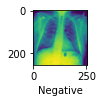

In [ ]:
# Plotting the image
plt.figure(figsize=(1,1))
plt.imshow(data['file'][4000])
plt.xlabel(data['result'].iloc[4000])

Text(0.5, 0, 'Positive')

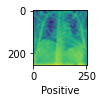

In [ ]:
# Plotting the image
plt.figure(figsize=(1,1))
plt.imshow(data['file'][13802])
plt.xlabel(data['result'].iloc[13802])

In [ ]:
import cv2


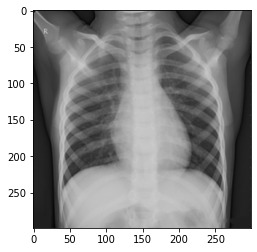

In [ ]:
image=cv2.imread(data['path'].iloc[1])
plt.imshow(image)

In [ ]:
data['file'].iloc[13802].shape

(256, 256)

In [ ]:
data.to_csv('dataset.csv')

Preparing Dataset for Training

In [ ]:
import shutil

In [ ]:
classes = ['COVID','Normal']
dataset_path

'/content/gdrive/My Drive/COVID_DETECTION/dataset/COVID-19_Radiography_Dataset'

In [ ]:
for i in classes:
  os.makedirs(dataset_path +'/train/' + i)

  os.makedirs(dataset_path +'/test/' + i)

  source = dataset_path + '/' + i

  allFileNames = os.listdir(source)

  np.random.shuffle(allFileNames)

  test_ratio = 0.25

  train_FileNames, test_FileNames = np.split(np.array(allFileNames),[int(len(allFileNames)* (1 - test_ratio))])

  train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
  test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]

  for name in train_FileNames:
    shutil.copy(name, dataset_path +'/train/' + i)

  for name in test_FileNames:
    shutil.copy(name, dataset_path +'/test/' + i)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_path = '/content/gdrive/MyDrive/COVID_DETECTION/dataset/COVID-19_Radiography_Dataset/train'
test_path = '/content/gdrive/MyDrive/COVID_DETECTION/dataset/COVID-19_Radiography_Dataset/test'

In [ ]:
train_data_gen = 
(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_data_gen.flow_from_directory(
    train_path,
    target_size=(48,48),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)


Found 10356 images belonging to 2 classes.


In [ ]:
validation_generator = validation_data_gen.flow_from_directory(
    test_path,
    target_size=(48,48),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)



Found 3452 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(48,48,1)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2,activation='softmax')) #change number of neuron from 7 to total classes or categories in your dataset 

model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001,decay=1e-6),metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model_info = model.fit(
    train_generator,
    steps_per_epoch=10356//64, #change 28709 to total num of images that you have for training
    epochs=50,
)

Epoch 1/50
161/161 [==============================] - 173s 1s/step - loss: 0.4529 - accuracy: 0.7913
Epoch 2/50
161/161 [==============================] - 171s 1s/step - loss: 0.3921 - accuracy: 0.8258
Epoch 3/50
161/161 [==============================] - 172s 1s/step - loss: 0.3396 - accuracy: 0.8510
Epoch 4/50
161/161 [==============================] - 168s 1s/step - loss: 0.3077 - accuracy: 0.8678
Epoch 5/50
161/161 [==============================] - 167s 1s/step - loss: 0.2869 - accuracy: 0.8772
Epoch 6/50
161/161 [==============================] - 167s 1s/step - loss: 0.2748 - accuracy: 0.8822
Epoch 7/50
161/161 [==============================] - 172s 1s/step - loss: 0.2587 - accuracy: 0.8904
Epoch 8/50
161/161 [==============================] - 171s 1s/step - loss: 0.2406 - accuracy: 0.9016
Epoch 9/50
161/161 [==============================] - 170s 1s/step - loss: 0.2343 - accuracy: 0.9006
Epoch 10/50
161/161 [==============================] - 170s 1s/step - loss: 0.2214 - accura

In [ ]:
model.save(dataset_path)

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/COVID_DETECTION/dataset/COVID-19_Radiography_Dataset/assets


In [ ]:
import tensorflow as tf
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(dataset_path) # path to the SavedModel directory
tflite_model = converter.convert()
# Model Path
model_path = dataset_path+'/model.tflite'
# Save the model.
with open(model_path, 'wb') as f:
  f.write(tflite_model)

In [ ]:
test_loss,test_accuracy=model.evaluate(validation_generator,steps=3452//64)

53/53 [==============================] - 23s 427ms/step - loss: 0.1175 - accuracy: 0.9558


In [ ]:
test_accuracy

0.9557783007621765

In [ ]:
model.predict(validation_generator)

array([[1.0844599e-06, 9.9999893e-01],
       [2.2127603e-04, 9.9977869e-01],
       [9.0216091e-08, 9.9999988e-01],
       ...,
       [6.1339466e-04, 9.9938655e-01],
       [1.2332305e-05, 9.9998772e-01],
       [2.3338257e-03, 9.9766624e-01]], dtype=float32)

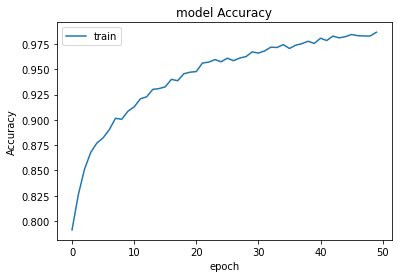

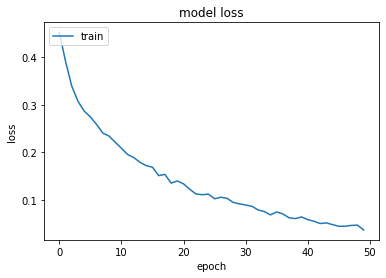

In [ ]:
# summarize history for accuracy
plt.plot(model_info.history['accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_info.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from tensorflow import keras
import tensorflow as tf
from keras.preprocessing.image import array_to_img
import PIL.Image
from keras.preprocessing import image
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer

import imutils
from keras.preprocessing.image import array_to_img,img_to_array

cnn = keras.models.load_model(dataset_path)

In [ ]:
labels=[['COVID','Normal']]

mlb = MultiLabelBinarizer()

mlb.fit(labels)



MultiLabelBinarizer()

In [ ]:
mlb.classes_

array(['COVID', 'Normal'], dtype=object)

In [ ]:

# load the image
image = cv2.imread('/content/Normal-10019.png')
image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
output = imutils.resize(image, width=400)
 
# pre-process the image for classification
image = cv2.resize(image, (48, 48))

image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

In [ ]:
proba = cnn.predict(image)[0]
idxs = np.argsort(proba)[::-1][:2]
idxs

array([1, 0])

COVID: 0.18%
Normal: 99.82%


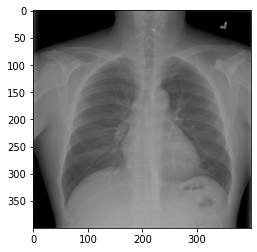

In [ ]:
from matplotlib import pyplot as plt


# loop over the indexes of the high confidence class labels
for (i, j) in enumerate(idxs):
	# build the label and draw the label on the image
	label = "{}: {:.2f}%".format(mlb.classes_[j], proba[j] * 100)
# show the probabilities for each of the individual labels
for (label, p) in zip(mlb.classes_, proba):
	print("{}: {:.2f}%".format(label, p * 100))
# show the output image
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.show()

COVID: 84.89%
Normal: 15.11%


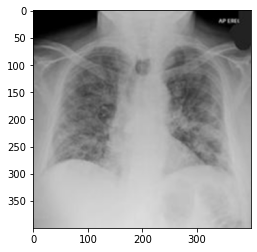

In [ ]:
# load the image
image = cv2.imread('/content/COVID-74.png')
image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
output = imutils.resize(image, width=400)
 
# pre-process the image for classification
image = cv2.resize(image, (48, 48))

image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)


proba = cnn.predict(image)[0]
idxs = np.argsort(proba)[::-1][:2]


# loop over the indexes of the high confidence class labels
for (i, j) in enumerate(idxs):
	# build the label and draw the label on the image
	label = "{}: {:.2f}%".format(mlb.classes_[j], proba[j] * 100)
# show the probabilities for each of the individual labels
for (label, p) in zip(mlb.classes_, proba):
	print("{}: {:.2f}%".format(label, p * 100))
# show the output image
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.show()
